In [0]:
# import library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
%matplotlib inline

In [0]:
# load dataset
dataframe = pd.read_csv("housing.csv",header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13:14]

In [0]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
# Buat arsitektur jaringan
model = tf.keras.Sequential()

#model.add(tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu',input_shape=(13,)))
#model.add(tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu'))
#model.add(tf.keras.layers.Dense(64,kernel_initializer='normal',activation='relu'))
#model.add(tf.keras.layers.Dense(8,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(13,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
cvscores = []
kfold = KFold(n_splits=10,shuffle=True)
for train, test in kfold.split(X,Y):
  model.add(tf.keras.layers.Dense(13,kernel_initializer='normal',activation='relu'))
  model.add(tf.keras.layers.Dense(1,kernel_initializer='normal'))
  model.fit(X[train],Y[train],epochs=50,verbose=0)
  scores= model.evaluate(X[test],Y[test],verbose=0)
  print((scores))
  cvscores.append(scores)
print("%.2f (+/- %.2f)"%(np.mean(cvscores),np.std(cvscores)))

12.67381675570619
10.1169298583386
7.354764985103233
7.448023955027263
10.503809573603611
7.240258927438774
25.16762741088867
13.055893936157226
16.70672866821289
10.937520294189452
12.12 (+/- 5.18)


In [0]:
cvscores = []
kfold = KFold(n_splits=10,shuffle=True)
for train, test in kfold.split(X,Y):
  model.add(tf.keras.layers.Dense(13,kernel_initializer='normal',activation='relu'))
  model.add(tf.keras.layers.Dense(1,kernel_initializer='normal'))
  model.fit(X[train],Y[train],epochs=10,verbose=0)
  scores= model.evaluate(X[test],Y[test],verbose=0)
  print((scores))
  cvscores.append(scores)
print("%.2f (+/- %.2f)"%(np.mean(cvscores),np.std(cvscores)))

11.201701351240569
6.069269591686773
14.670387492460364
12.565559798595952
8.253859688253964
4.057821161606732
4.1214910507202145
7.6613929748535154
14.649338150024414
3.2912330055236816
8.65 (+/- 4.15)


In [0]:
cvscores = []
kfold = KFold(n_splits=10,shuffle=True)
for train, test in kfold.split(X,Y):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu',input_shape=(13,)))
  model.add(tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu'))
  model.add(tf.keras.layers.Dense(8,kernel_initializer='normal',activation='relu'))
  model.add(tf.keras.layers.Dense(1,kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  model.fit(X[train],Y[train],epochs=100,verbose=0)
  scores= model.evaluate(X[test],Y[test],verbose=0)
  print((scores))
  cvscores.append(scores)
print("%.2f (+/- %.2f)"%(np.mean(cvscores),np.std(cvscores)))

10.668072139515596
14.308297549977022
45.07380721148323
18.354163917840697
16.644139906939337
18.06139517765419
19.84389724731445
10.806161155700684
13.10805965423584
55.508590087890624
22.24 (+/- 14.52)


In [0]:
J = model.fit(X,Y,validation_split=0.33,epochs=20,batch_size=128)

Train on 339 samples, validate on 167 samples
Epoch 1/20
339/339 [==============================] - 0s 167us/sample - loss: 19.5370 - val_loss: 34.1156
Epoch 2/20
339/339 [==============================] - 0s 104us/sample - loss: 17.4337 - val_loss: 31.8364
Epoch 3/20
339/339 [==============================] - 0s 85us/sample - loss: 16.9202 - val_loss: 36.9842
Epoch 4/20
339/339 [==============================] - 0s 85us/sample - loss: 16.5222 - val_loss: 35.8865
Epoch 5/20
339/339 [==============================] - 0s 99us/sample - loss: 15.4052 - val_loss: 27.6359
Epoch 6/20
339/339 [==============================] - 0s 79us/sample - loss: 14.6451 - val_loss: 25.0669
Epoch 7/20
339/339 [==============================] - 0s 67us/sample - loss: 14.1606 - val_loss: 24.3875
Epoch 8/20
339/339 [==============================] - 0s 94us/sample - loss: 14.2961 - val_loss: 23.1166
Epoch 9/20
339/339 [==============================] - 0s 90us/sample - loss: 14.0527 - val_loss: 21.3720
Epoch 1

dict_keys(['loss', 'val_loss'])


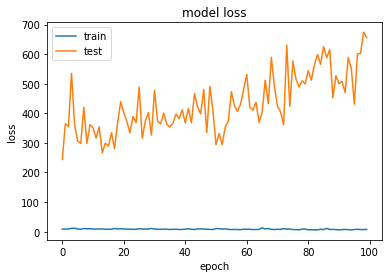

In [0]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()